In [1]:
import pandas as pd
import numpy as np

In [2]:
df_train = pd.read_csv('train.csv')
df_stores = pd.read_csv('stores.csv')
df_holiday = pd.read_csv('Holiday Dates.csv', delimiter= ';')
df_features = pd.read_csv('features.csv')
df_department = pd.read_csv('Departments.csv', delimiter = ';')


In [3]:
df_merged = df_train.merge(df_stores, on='Store', how ='left')
df_merged = df_department.merge(df_merged, on= 'Dept', how= 'right')
df_merged = df_features.merge(df_merged, on=['Date','Store'], how = 'right')
#drop one of the holiday tables
df_merged = df_merged.drop(['IsHoliday_y'], axis=1)


In [4]:
#convert date to datetime format
df_merged['Date'] = pd.to_datetime(df_merged['Date'])
df_merged.describe()


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Dept,Weekly_Sales,Size
count,421570.000000,421570,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,2011-06-18 08:30:31.963375104,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289,44.260317,15981.258123,136727.915739
min,1.000000,2010-02-05 00:00:00,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000,1.000000,-4988.940000,34875.000000
25%,11.000000,2010-10-08 00:00:00,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000,18.000000,2079.650000,93638.000000
50%,22.000000,2011-06-17 00:00:00,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000,37.000000,7612.030000,140167.000000
75%,33.000000,2012-02-24 00:00:00,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000,74.000000,20205.852500,202505.000000
max,45.000000,2012-10-26 00:00:00,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,99.000000,693099.360000,219622.000000
std,12.785297,NaN,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296,30.492054,22711.183519,60980.583328


In [5]:
df_merged.info()

#we have 421570 rows and 16 columns

#here's what the columns represent:
#Store: store number    
#Dept: department number
#Date: date of sales record (weekly)
#Weekly_Sales: sales for the given department in the given store
#IsHoliday_x: whether the week is a special holiday week
#Temperature: average temperature in the region
#Fuel_Price: cost of fuel in the region
#MarkDown1-5: anonymized data related to promotional markdowns that Walmart is running (MarkDown data is only available after Nov 2011, and is not available for all stores all the time)
#Markdown columns have missing values, which could mean not all stores participate in the markdowns or that there were no markdowns for that week
#CPI: consumer price index (a measure of inflation)
#Unemployment: unemployment rate
#Type: store type
#Size: store size
#Description: department description

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Date          421570 non-null  datetime64[ns]
 2   Temperature   421570 non-null  float64       
 3   Fuel_Price    421570 non-null  float64       
 4   MarkDown1     150681 non-null  float64       
 5   MarkDown2     111248 non-null  float64       
 6   MarkDown3     137091 non-null  float64       
 7   MarkDown4     134967 non-null  float64       
 8   MarkDown5     151432 non-null  float64       
 9   CPI           421570 non-null  float64       
 10  Unemployment  421570 non-null  float64       
 11  IsHoliday_x   421570 non-null  bool          
 12  Dept          421570 non-null  int64         
 13  Description   421554 non-null  object        
 14  Weekly_Sales  421570 non-null  float64       
 15  Type          421

In [6]:
#Fill in the missing Description elements with Unnamed 
df_merged['Description'] = df_merged['Description'].fillna('Unnamed')

#Given that the MarkDown data is only available after Nov 2011 and is not consistent across all stores, 
# it's likely that the missingness in this column is not random. This makes the decision to fill in zeros less appealing, 
#we will do it anyway for now and see how it affects our model later on
#fill in missing values in markdown columns with 0
df_merged['MarkDown1'] = df_merged['MarkDown1'].fillna(0)
df_merged['MarkDown2'] = df_merged['MarkDown2'].fillna(0)
df_merged['MarkDown3'] = df_merged['MarkDown3'].fillna(0)
df_merged['MarkDown4'] = df_merged['MarkDown4'].fillna(0)
df_merged['MarkDown5'] = df_merged['MarkDown5'].fillna(0)




In [7]:

print(df_merged.isnull().sum())

Store           0
Date            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday_x     0
Dept            0
Description     0
Weekly_Sales    0
Type            0
Size            0
dtype: int64


In [8]:
print(df_merged.head())
print(len(df_merged.index))

   Store       Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  \
0      1 2010-02-05        42.31       2.572        0.0        0.0        0.0   
1      1 2010-02-12        38.51       2.548        0.0        0.0        0.0   
2      1 2010-02-19        39.93       2.514        0.0        0.0        0.0   
3      1 2010-02-26        46.63       2.561        0.0        0.0        0.0   
4      1 2010-03-05        46.50       2.625        0.0        0.0        0.0   

   MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday_x  Dept  \
0        0.0        0.0  211.096358         8.106        False     1   
1        0.0        0.0  211.242170         8.106         True     1   
2        0.0        0.0  211.289143         8.106        False     1   
3        0.0        0.0  211.319643         8.106        False     1   
4        0.0        0.0  211.350143         8.106        False     1   

         Description  Weekly_Sales Type    Size  
0  Candy and Tobacco      2492

In [9]:
print(df_merged.shape)
print(df_merged.dtypes)

(421570, 17)
Store                    int64
Date            datetime64[ns]
Temperature            float64
Fuel_Price             float64
MarkDown1              float64
MarkDown2              float64
MarkDown3              float64
MarkDown4              float64
MarkDown5              float64
CPI                    float64
Unemployment           float64
IsHoliday_x               bool
Dept                     int64
Description             object
Weekly_Sales           float64
Type                    object
Size                     int64
dtype: object


In [10]:
# we need group means for temp, fiuel price, cpi, unemployment, weekly sales. 
#categoeries are store, dept, date, isholiday, type, size, description

#for the outliers, we'll consider weekly sales, temperature, fuel price, cpi
outliers_columns = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

#lets count the outliers and store them in a dictionary
outliers = {}

df_clean = df_merged.copy() #create a copy of the df_merged so we can remove outliers from it

for column in outliers_columns:
    Q1 = df_merged[column].quantile(0.25) #calculate quartiles
    Q3 = df_merged[column].quantile(0.75)  #calculate quartiles
    IQR = Q3 - Q1
    outliers= df_merged[(df_merged[column] < (Q1 - 1.5 * IQR)) | (df_merged[column] > (Q3 + 1.5 * IQR))] #outliers for each column

df_clean = df_clean[~df_clean.index.isin(outliers.index)] #remove outliers from df_clean

group_columns = ['Store', 'Dept', 'Type', 'Description'] #group by these columns
average_columns = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Weekly_Sales'] 

#calc means for the three columns grouped by dept
grouped_mean = df_clean.groupby(group_columns)[average_columns].mean() #group by the columns and calc mean for the average columns
print(grouped_mean.head()) 

                                   Temperature  Fuel_Price         CPI  \
Store Dept Type Description                                              
1     1    A    Candy and Tobacco    68.306783    3.219699  215.996892   
      2    A    Health and Beauty    68.306783    3.219699  215.996892   
      3    A    Stationery           68.306783    3.219699  215.996892   
      4    A    Paper Goods          68.306783    3.219699  215.996892   
      5    A    Media and Gaming     68.306783    3.219699  215.996892   

                                   Unemployment  Weekly_Sales  
Store Dept Type Description                                    
1     1    A    Candy and Tobacco       7.61042  22513.322937  
      2    A    Health and Beauty       7.61042  46102.090420  
      3    A    Stationery              7.61042  13150.478042  
      4    A    Paper Goods             7.61042  36964.154476  
      5    A    Media and Gaming        7.61042  24257.941119  


In [11]:
#howmany outliers are there?
print(outliers.count())
print(outliers.info())

#print the percentage of outliers in the columns [ 'Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
print(outliers.count()/df_merged.count())

Store           32114
Date            32114
Temperature     32114
Fuel_Price      32114
MarkDown1       32114
MarkDown2       32114
MarkDown3       32114
MarkDown4       32114
MarkDown5       32114
CPI             32114
Unemployment    32114
IsHoliday_x     32114
Dept            32114
Description     32114
Weekly_Sales    32114
Type            32114
Size            32114
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 32114 entries, 29631 to 380971
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         32114 non-null  int64         
 1   Date          32114 non-null  datetime64[ns]
 2   Temperature   32114 non-null  float64       
 3   Fuel_Price    32114 non-null  float64       
 4   MarkDown1     32114 non-null  float64       
 5   MarkDown2     32114 non-null  float64       
 6   MarkDown3     32114 non-null  float64       
 7   MarkDown4     32114 non-null  float64       
 8  

In [12]:
#print(df_clean.head())
print(df_clean.info())

<class 'pandas.core.frame.DataFrame'>
Index: 389456 entries, 0 to 421569
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         389456 non-null  int64         
 1   Date          389456 non-null  datetime64[ns]
 2   Temperature   389456 non-null  float64       
 3   Fuel_Price    389456 non-null  float64       
 4   MarkDown1     389456 non-null  float64       
 5   MarkDown2     389456 non-null  float64       
 6   MarkDown3     389456 non-null  float64       
 7   MarkDown4     389456 non-null  float64       
 8   MarkDown5     389456 non-null  float64       
 9   CPI           389456 non-null  float64       
 10  Unemployment  389456 non-null  float64       
 11  IsHoliday_x   389456 non-null  bool          
 12  Dept          389456 non-null  int64         
 13  Description   389456 non-null  object        
 14  Weekly_Sales  389456 non-null  float64       
 15  Type          389456 n

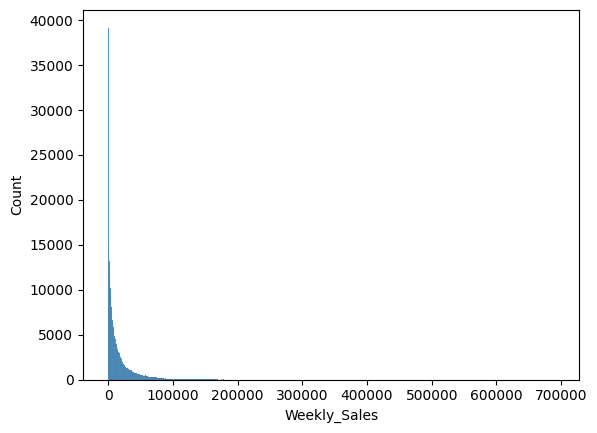

In [13]:
#checking distributions for our numerical columns
import matplotlib.pyplot as plt
import seaborn as sns
sns.histplot(df_clean['Weekly_Sales'])
plt.show()


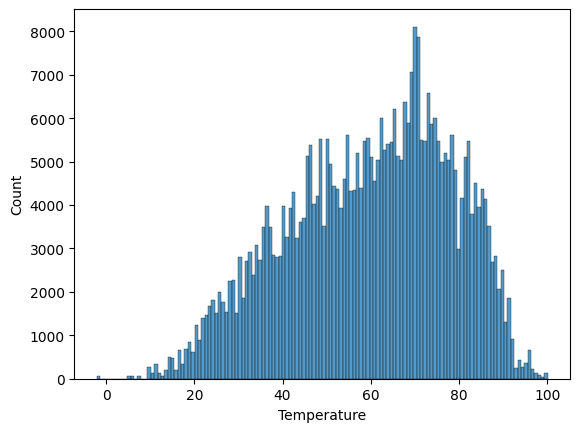

In [14]:
#checking distribution for temperature
sns.histplot(df_clean['Temperature'])
plt.show()

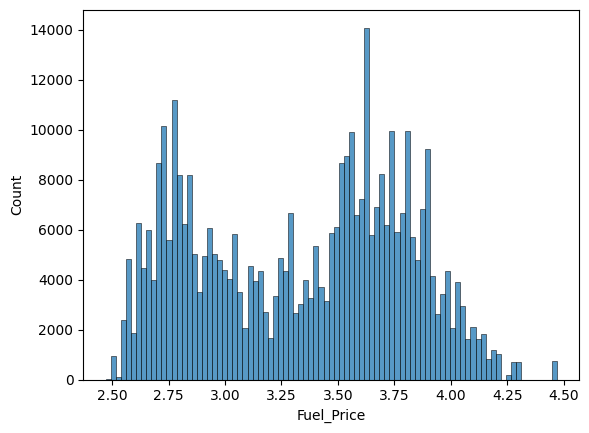

In [15]:
#checking distributions for fuel price
sns.histplot(df_clean['Fuel_Price'])
plt.show()


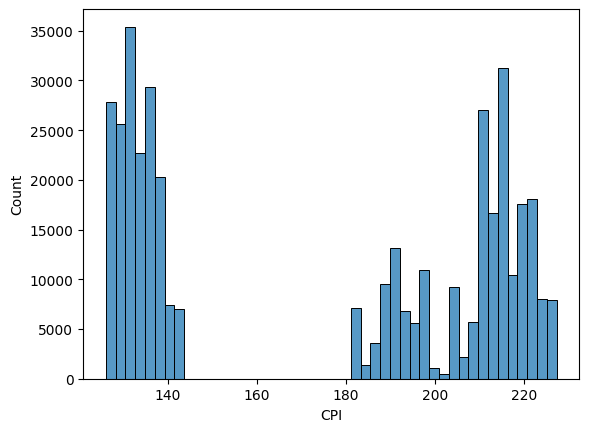

In [16]:
#checking distributions
sns.histplot(df_clean['CPI'])
plt.show()


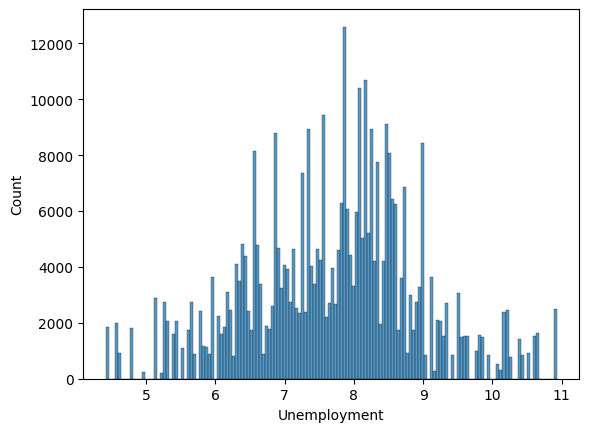

In [17]:
#checking distributions
sns.histplot(df_clean['Unemployment'])
plt.show()


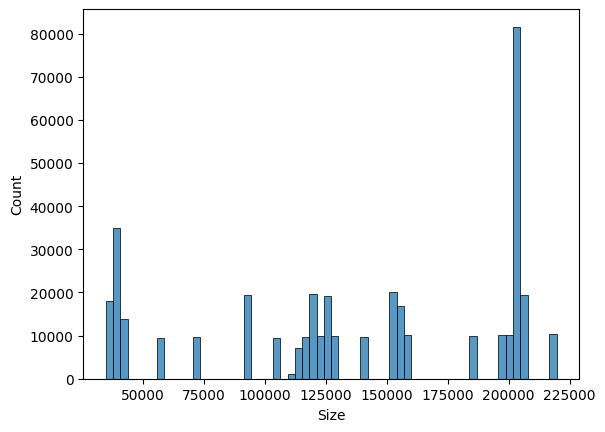

In [18]:
#checking distributions
sns.histplot(df_clean['Size'])
plt.show()


In [19]:
#which columns are normally distributed?
#Weekly sales is not normally distributed
#Temperature is normally distributed
#Fuel price is not normally distributed
#CPI is not normally distributed
#Unemployment is not normally distributed
#Size is not normally distributed

#checking range, mean, median, and mode for each numerical column (without describe method)
#Weekly sales
print('Range:', df_clean['Weekly_Sales'].max() - df_clean['Weekly_Sales'].min())
print('Mean:', df_clean['Weekly_Sales'].mean())
print('Median:', df_clean['Weekly_Sales'].median())
print('Mode:', df_clean['Weekly_Sales'].mode())

#Temperature
print('Range:', df_clean['Temperature'].max() - df_clean['Temperature'].min())
print('Mean:', df_clean['Temperature'].mean())
print('Median:', df_clean['Temperature'].median())
print('Mode:', df_clean['Temperature'].mode())

#Fuel Price
print('Range:', df_clean['Fuel_Price'].max() - df_clean['Fuel_Price'].min())
print('Mean:', df_clean['Fuel_Price'].mean())
print('Median:', df_clean['Fuel_Price'].median())
print('Mode:', df_clean['Fuel_Price'].mode())

#CPI
print('Range:', df_clean['CPI'].max() - df_clean['CPI'].min())
print('Mean:', df_clean['CPI'].mean())
print('Median:', df_clean['CPI'].median())
print('Mode:', df_clean['CPI'].mode())

#Unemployment
print('Range:', df_clean['Unemployment'].max() - df_clean['Unemployment'].min())
print('Mean:', df_clean['Unemployment'].mean())
print('Median:', df_clean['Unemployment'].median())
print('Mode:', df_clean['Unemployment'].mode())

#Size
print('Range:', df_clean['Size'].max() - df_clean['Size'].min())
print('Mean:', df_clean['Size'].mean())
print('Median:', df_clean['Size'].median())
print('Mode:', df_clean['Size'].mode())

#checking unique values for categorical columns
#Store
print(df_clean['Store'].unique())
#Dept
print(df_clean['Dept'].unique())
#Type
print(df_clean['Type'].unique())
#Description
print(df_clean['Description'].unique())

#checkign frequency of categorical columns
#Store
print(df_clean['Store'].value_counts())
#Dept
print(df_clean['Dept'].value_counts())
#Type
print(df_clean['Type'].value_counts())
#Description
print(df_clean['Description'].value_counts())




Range: 697023.36
Mean: 15992.995466522538
Median: 7561.575
Mode: 0    10.0
Name: Weekly_Sales, dtype: float64
Range: 102.2
Mean: 59.66190142146995
Median: 61.77
Mode: 0    67.87
Name: Temperature, dtype: float64
Range: 1.996
Mean: 3.3410955486627505
Median: 3.417
Mode: 0    3.638
Name: Fuel_Price, dtype: float64
Range: 101.1688068
Mean: 174.56918704395778
Median: 189.6190057
Mode: 0    131.108333
Name: CPI, dtype: float64
Range: 6.506
Mean: 7.704348750564888
Median: 7.85
Mode: 0    8.099
Name: Unemployment, dtype: float64
Range: 184747
Mean: 136924.75493252126
Median: 140167.0
Mode: 0    39910
Name: Size, dtype: int64
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33 34 35 36 37 38 40 41 42 44 45 46 47 48 49 51 52
 54 55 56 58 59 60 67 71 72 74 77 78 79 80 81 82 83 85 87 90 91 92 93 94
 95 96 97 98 99 3

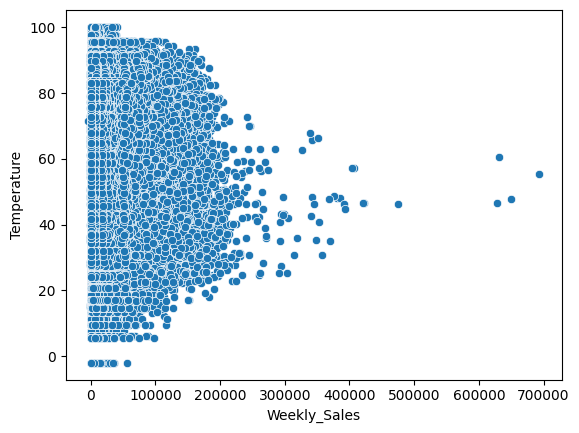

Pearsons correlation: -0.002


In [20]:
# doing bivariate analysis
# checking correlation between numerical columns
#Weekly sales and temperature
sns.scatterplot(x='Weekly_Sales', y='Temperature', data=df_clean)
plt.show()

#using a more interpretable correlation method
from scipy.stats import pearsonr
corr, _ = pearsonr(df_clean['Weekly_Sales'], df_clean['Temperature'])
print('Pearsons correlation: %.3f' % corr)

#the correlation between weekly sales and temperature is very weak

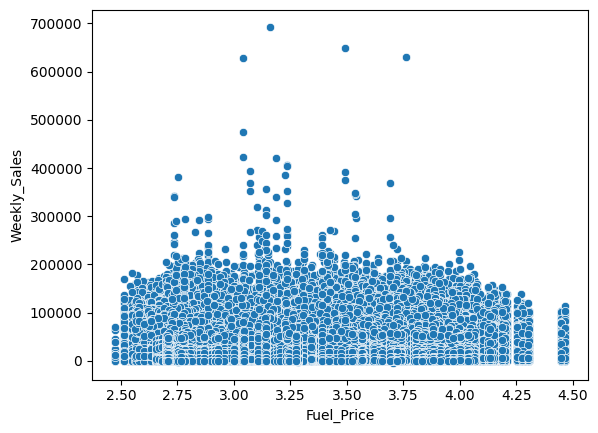

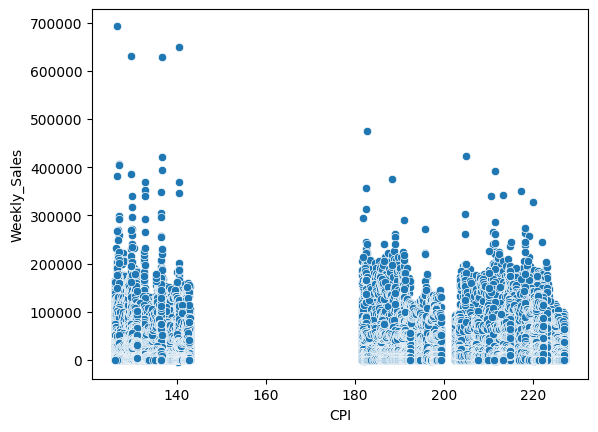

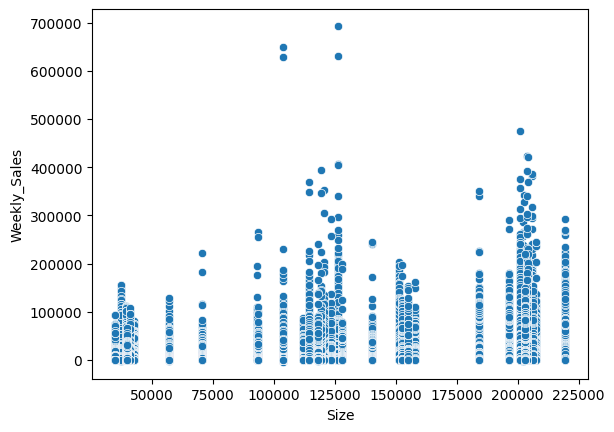

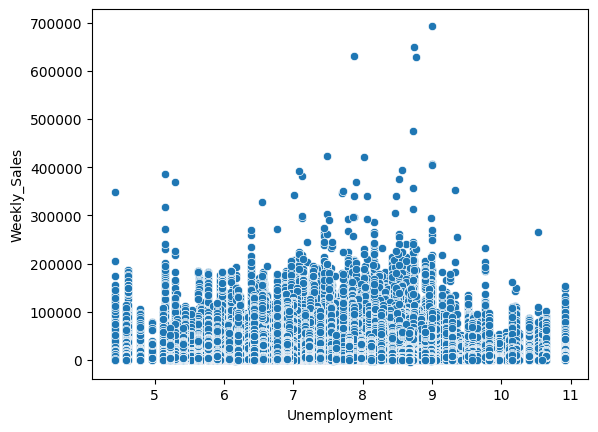

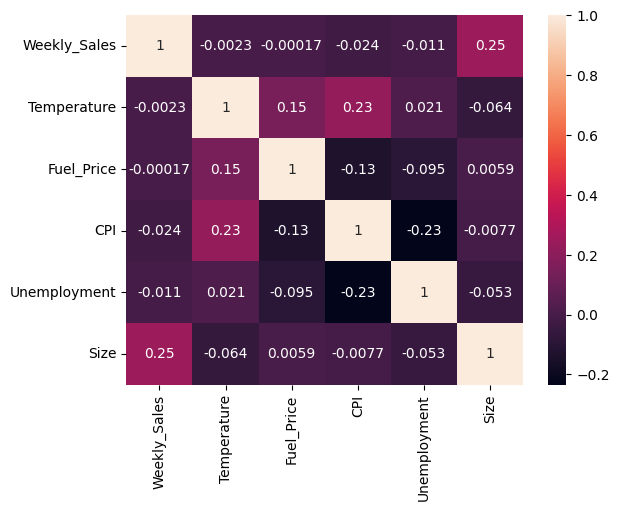

In [21]:
#Weekly sales and fuel price
sns.scatterplot(x= 'Fuel_Price', y='Weekly_Sales', data=df_clean)
plt.show()
#Weekly sales and CPI
sns.scatterplot(x='CPI', y='Weekly_Sales', data=df_clean)
plt.show()
#Weekly sales and size
sns.scatterplot(x='Size', y='Weekly_Sales', data=df_clean)
plt.show()
#Weekly sales and unemployment
sns.scatterplot(x='Unemployment', y='Weekly_Sales', data=df_clean)
plt.show()

# lets make a heatmap for all numerical columns
sns.heatmap(df_clean [['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Size']].corr(), annot=True)
plt.show()





In [22]:
# most of the correlations are weak and negative
# the strongest correlation is between weekly sales and size, which is weak and positive
# also  CPI and Temperature have a weak positive correlation

#the patterns that are evident from the scatterplots are:
#the weekly sales are higher when the fuel price is lower
#the weekly sales are higher when the CPI and Size and Temperature is higher
#the weekly sales are lower when the unemployment is higher


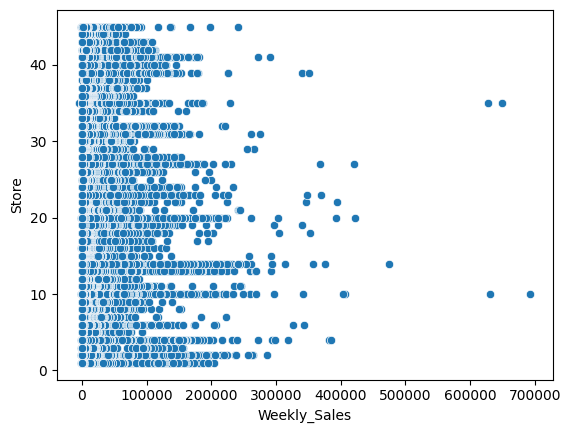

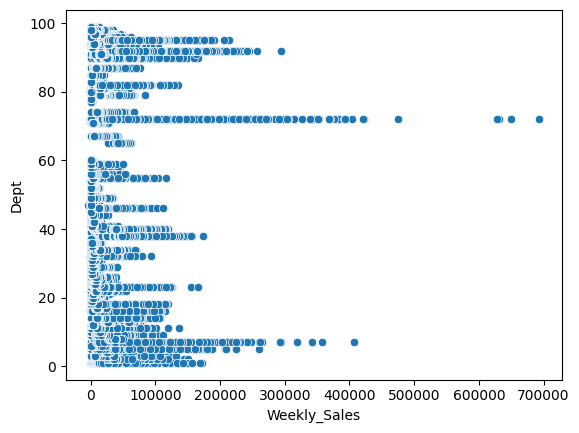

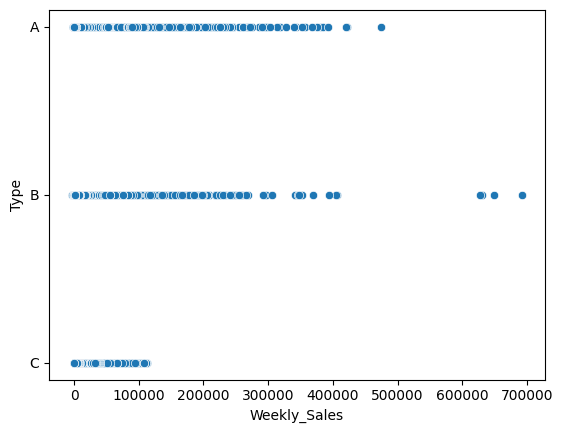

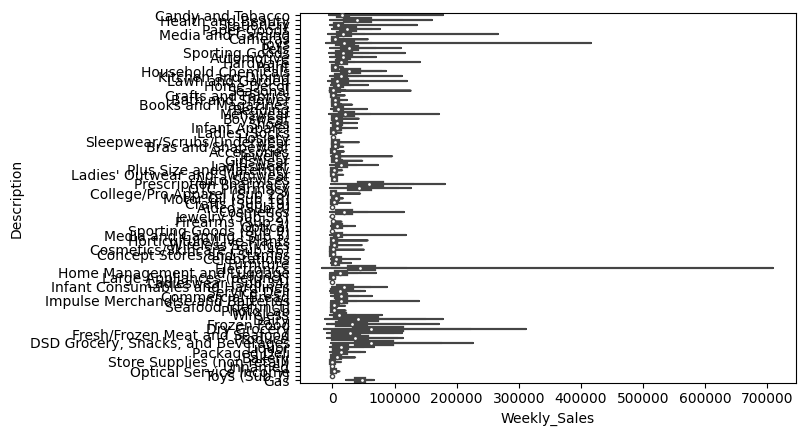

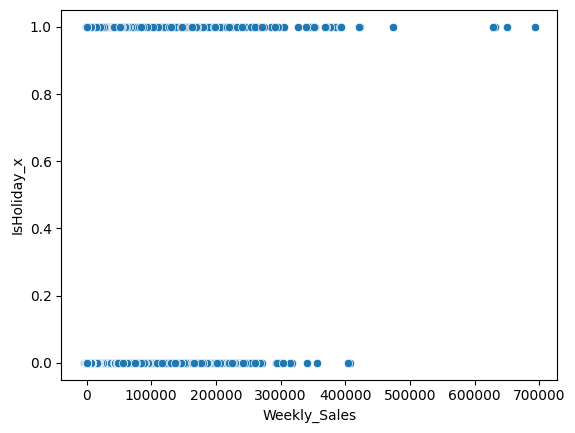

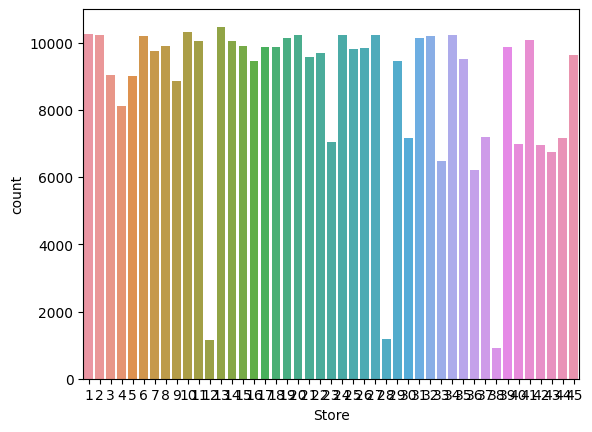

In [23]:
#for bivariate analysis, we'll compare the following columns:
#weekly sales and store
#weekly sales and dept
#weekly sales and type
#weekly sales and description
#weekly sales and isholiday

#weekly sales and store
sns.scatterplot(x='Weekly_Sales', y='Store', data=df_clean)
plt.show()

#weekly sales and dept
sns.scatterplot(x='Weekly_Sales', y='Dept', data=df_clean)
plt.show()

#weekly sales and type
sns.scatterplot(x='Weekly_Sales', y='Type', data=df_clean)
plt.show()

#weekly sales and description
sns.violinplot(x='Weekly_Sales', y='Description', data=df_clean)
plt.show()

#weekly sales and isholiday
sns.scatterplot(x='Weekly_Sales', y='IsHoliday_x', data=df_clean)
plt.show()

sns.countplot(x='Store', data=df_clean)
plt.show()





In [24]:
#Which categorical columns are you comparing against each other?
#Store and Dept
#Store and Type
#Store and Description
#Dept and Type
#Dept and Description
#Type and Description


#checkign unique combinations for categorical columns
#Store and Dept
print(df_clean.groupby(['Store', 'Dept']).size())

#Store and Type
print(df_clean.groupby(['Store', 'Type']).size())

#Store and Description
print(df_clean.groupby(['Store', 'Description']).size())

#Dept and Type
print(df_clean.groupby(['Dept', 'Type']).size())

#Dept and Description
print(df_clean.groupby(['Dept', 'Description']).size())

#Type and Description
print(df_clean.groupby(['Type', 'Description']).size())





Store  Dept
1      1       143
       2       143
       3       143
       4       143
       5       143
              ... 
45     94      134
       95      143
       96        2
       97      143
       98      135
Length: 3319, dtype: int64
Store  Type
1      A       10244
2      A       10238
3      B        9036
4      A        8112
5      B        8999
6      A       10211
7      B        9762
8      A        9895
9      B        8867
10     B       10315
11     A       10062
12     B        1153
13     A       10474
14     A       10040
15     B        9901
16     B        9443
17     B        9864
18     B        9859
19     A       10148
20     A       10214
21     B        9582
22     B        9688
23     B        7040
24     A       10228
25     B        9804
26     A        9854
27     A       10225
28     A        1196
29     B        9455
30     C        7156
31     A       10142
32     A       10202
33     A        6487
34     A       10224
35     B        9528
36   

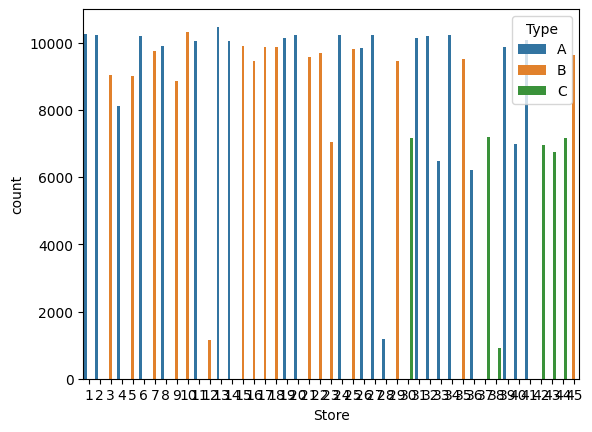

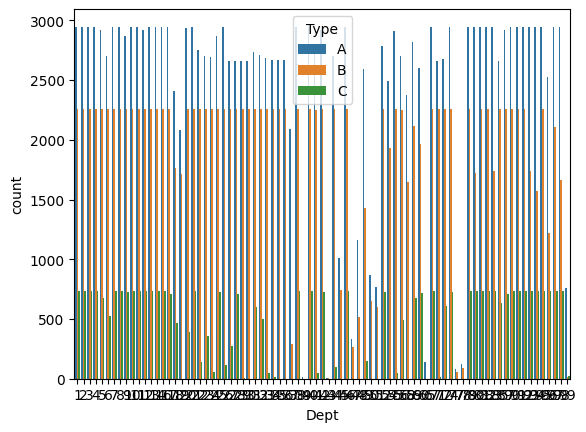

In [25]:
#visualizing the relationships with a mosaic plot
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic

#lets try a countplot
sns.countplot(x='Store', hue='Type', data=df_clean)
plt.show()


#another countplot
sns.countplot(x='Dept', hue='Type', data=df_clean)
plt.show()



In [31]:
# Prerparing the data for Feature Engineering

#Breaking down the Date to Days/Weeks/Months
df_clean['Day'] = pd.to_datetime(df_clean['Date']).dt.day
df_clean['Month'] = pd.to_datetime(df_clean['Date']).dt.month
df_clean['Year'] = pd.to_datetime(df_clean['Date']).dt.year
# creating a new column for weeks in a year. datetime has no week of year attribute, so we'll use the isocalendar method
df_clean['Week'] = pd.to_datetime(df_clean['Date']).dt.isocalendar().week
#creating a new column for quarters in a year
df_clean['Quarter'] = pd.to_datetime(df_clean['Date']).dt.quarter

#creating average weekly sales columns for each store and dept
df_clean['Average_Weekly_Sales_Store_Dept'] = df_clean.groupby(['Store', 'Dept'])['Weekly_Sales'].transform('mean')

#check the column
print(df_clean['Average_Weekly_Sales_Store_Dept'].groupby([df_clean['Store'], df_clean['Dept']]).mean())

#creating binary flags for markdowns This allows the model to distinguish between a missing value and a zero value.
df_clean['MarkDown1_Flag'] = np.where(df_clean['MarkDown1'] == 0, 0, 1)
df_clean['MarkDown2_Flag'] = np.where(df_clean['MarkDown2'] == 0, 0, 1)
df_clean['MarkDown3_Flag'] = np.where(df_clean['MarkDown3'] == 0, 0, 1)
df_clean['MarkDown4_Flag'] = np.where(df_clean['MarkDown4'] == 0, 0, 1)
df_clean['MarkDown5_Flag'] = np.where(df_clean['MarkDown5'] == 0, 0, 1)


print(df_clean.head(20))      
print(df_clean['Year'].unique())

Store  Dept
1      1       22513.322937
       2       46102.090420
       3       13150.478042
       4       36964.154476
       5       24257.941119
                   ...     
45     94       3690.272090
       95      52896.166643
       96          2.970000
       97       6466.961888
       98        561.239037
Name: Average_Weekly_Sales_Store_Dept, Length: 3319, dtype: float64
    Store       Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0       1 2010-02-05        42.31       2.572        0.0        0.0   
1       1 2010-02-12        38.51       2.548        0.0        0.0   
2       1 2010-02-19        39.93       2.514        0.0        0.0   
3       1 2010-02-26        46.63       2.561        0.0        0.0   
4       1 2010-03-05        46.50       2.625        0.0        0.0   
5       1 2010-03-12        57.79       2.667        0.0        0.0   
6       1 2010-03-19        54.58       2.720        0.0        0.0   
7       1 2010-03-26        51.45       2.73

In [27]:
#Bin the numerical columns:
#Temperature:
temp_bins = [0, 32, 70, 100]
temp_labels = ['Low', 'Medium', 'High']
df_clean['Temperature_binned'] = pd.cut(df_clean['Temperature'], bins = temp_bins, labels=temp_labels)

#Fuel_Price:
fuel_bins = [1, 2, 3, 4, 5]
fuel_labels = ['Low', 'Normal', 'High', 'Very High']
df_clean['Fuel_Price_binned'] = pd.cut(df_clean['Fuel_Price'], bins = fuel_bins, labels=fuel_labels)

#Unemployment:
print(df_clean['Unemployment'].describe())
unemp_bins = [4, 6, 8, 10]
unemp_labels = ['Low', 'Normal', 'High']
df_clean['Unemployment_binned'] = pd.cut(df_clean['Unemployment'], bins=unemp_bins, labels=unemp_labels)

#CPI:
print(df_clean['CPI'].describe())
cpi_bins= [110, 140, 170, 200, 230] 
cpi_labels= ['Low', 'Mean', 'High', 'Very High']
df_clean['CPI_binned'] = pd.cut(df_clean['CPI'], bins=cpi_bins, labels=cpi_labels)

#Size:
print(df_clean['Size'].describe())
size_bins= [30000, 60000, 90000, 120000, 150000, 220000]
size_labels= ['XS', 'S', 'M', 'L', 'XL']
df_clean['Size_binned']=pd.cut(df_clean['Size'], bins=size_bins, labels=size_labels)

#one hot encoding for the binned numerical columns
df_clean = pd.get_dummies(df_clean, columns=['Temperature_binned', 'Fuel_Price_binned', 'Unemployment_binned', 'CPI_binned', 'Size_binned'])


print(df_clean.head())

# i used labelencoder instead of dummies because of the large number of categories
#labelencoder is a better option for categorical variables with many categories
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
df_clean['Description'] = labelencoder.fit_transform(df_clean['Description'])
df_clean['Type']= labelencoder.fit_transform(df_clean['Type'])
# Since boolean data is already binary, there's no need to apply label encoding on holiday columns. This could introduce unnecessary confusion
#df_clean['IsHoliday_x'] = labelencoder.fit_transform(df_clean['IsHoliday_x'])

# checking if our labelencoder worked correctly
print(df_clean['Description'].unique())
print(df_clean['Type'].unique())


print(df_clean.head())


count    389456.000000
mean          7.704349
std           1.227553
min           4.420000
25%           6.891000
50%           7.850000
75%           8.476000
max          10.926000
Name: Unemployment, dtype: float64
count    389456.000000
mean        174.569187
std          38.855131
min         126.064000
25%         132.870839
50%         189.619006
75%         213.621178
max         227.232807
Name: CPI, dtype: float64
count    389456.000000
mean     136924.754933
std       60929.389341
min       34875.000000
25%       93638.000000
50%      140167.000000
75%      202505.000000
max      219622.000000
Name: Size, dtype: float64
   Store       Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  \
0      1 2010-02-05        42.31       2.572        0.0        0.0        0.0   
1      1 2010-02-12        38.51       2.548        0.0        0.0        0.0   
2      1 2010-02-19        39.93       2.514        0.0        0.0        0.0   
3      1 2010-02-26        46.63    

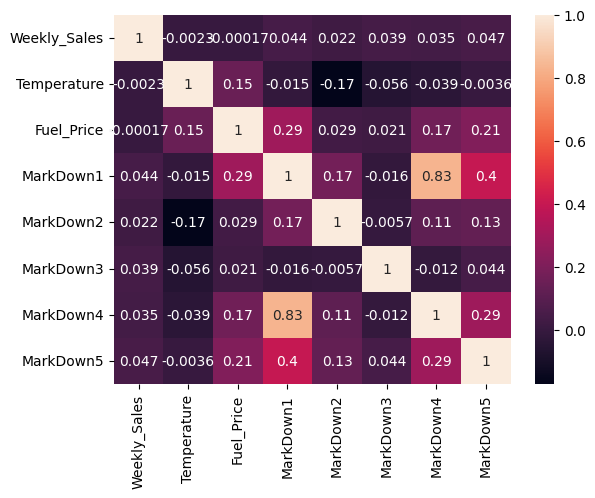

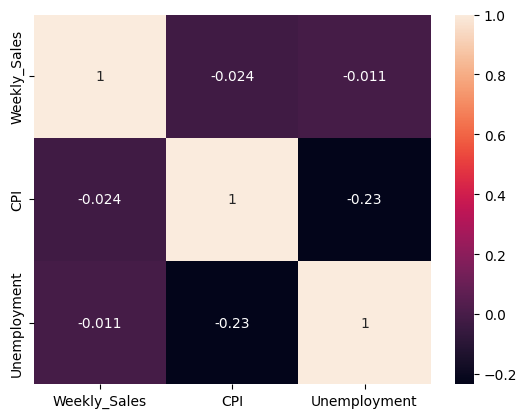

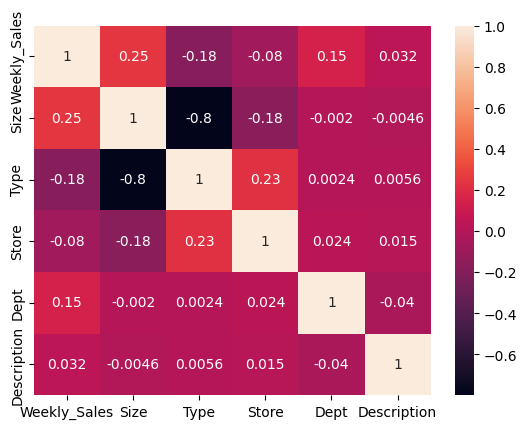

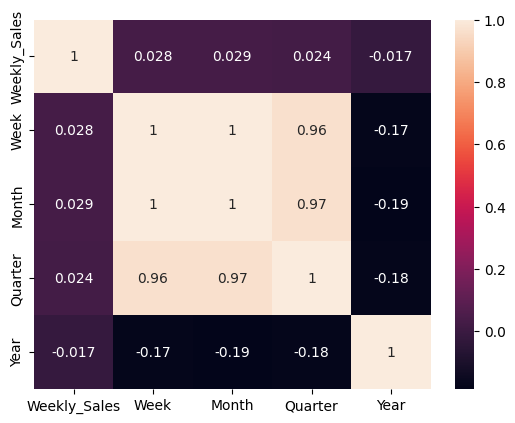

In [28]:
# we have to make sure to include Day, Department and Store in the Feature Matrix when we fit the model
#feature matrix
correlation_matrix = df_clean.corr()

# To visualize as a heatmap
# plt.figure(figsize=(12, 9))
# sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
# plt.show()

#checking correlation between columns in multiple heatmaps
#Weekly Sales and Temperature, Fuel Price, Markdowns
sns.heatmap(df_clean [['Weekly_Sales', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].corr(), annot=True)
plt.show()

#Weekly Sales and CPI, Unemployment
sns.heatmap(df_clean [['Weekly_Sales', 'CPI', 'Unemployment']].corr(), annot=True)
plt.show()

#Weekly Sales and Size, Type, Store, Dept, Description
sns.heatmap(df_clean [['Weekly_Sales', 'Size', 'Type', 'Store', 'Dept', 'Description']].corr(), annot=True)
plt.show()

#Weekly Sales and Week, Month, Quarter, Year, Weekly Sales Lag 1, Weekly Sales Lag 2
sns.heatmap(df_clean [['Weekly_Sales', 'Week', 'Month', 'Quarter', 'Year']].corr(), annot=True)
plt.show()


In [65]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score

#checking our columns again
print(df_clean.columns)

# X columns for the model
X = df_clean[['Store', 'Dept', 'Type', 'Size', 'Day', 'Month', 'Quarter', 'Week','Temperature', 'Fuel_Price', 
              'Average_Weekly_Sales_Store_Dept', 'CPI',
             'Unemployment', 'IsHoliday_x',
            'MarkDown1_Flag', 'MarkDown2_Flag', 'MarkDown3_Flag', 'MarkDown4_Flag', 'MarkDown5_Flag',
            'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 
            'CPI_binned_Low', 'CPI_binned_Mean','CPI_binned_High', 'CPI_binned_Very High',
            'Fuel_Price_binned_Low', 'Fuel_Price_binned_Normal', 'Fuel_Price_binned_High', 'Fuel_Price_binned_Very High',      
]]
y = df_clean['Weekly_Sales']

#splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y)

#not sure if we need to scale the data, but we'll do it anyway because it's good practice
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

#initializing the model
lm = LinearRegression()

#fitting the model
lm.fit(X_train, y_train)

#predicting the Linear model
y_pred = lm.predict(X_test)
print('Linear training set score:{:.2f}'.format(lm.score(X_train, y_train)) )
print('Linear test set score:{:.2f}'.format(lm.score(X_test, y_test)) )


#checking the intercept
print('Linear Intercept: \n', lm.intercept_)
#checking the mean squared error
print('Linear Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
#checking the r2 score
print('Linear R-Score: %.2f' % r2_score(y_test, y_pred)) 


#apply ridge regression
#initializing the model
ridge = Ridge(alpha=0.1)
#fitting the model
ridge.fit(X_train, y_train)
#predicting the model
y_pred = ridge.predict(X_test)
print('Ridge training set score:{:.2f}'.format(ridge.score(X_train, y_train)) )
print('Ridge test set score:{:.2f}'.format(ridge.score(X_test, y_test)) )

#checking the intercept
print('Ridge Intercept: \n', ridge.intercept_)
#checking the mean squared error
print('Ridge Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
#checking the r2 score
print('Ridge R-Score: %.2f' % r2_score(y_test, y_pred))


#apply lasso regression
#initializing the model
lasso = Lasso(alpha=0.1)
#fitting the model
lasso.fit(X_train, y_train)
#predicting the model
y_pred = lasso.predict(X_test)
print('Lasso training set score:{:.2f}'.format(lasso.score(X_train, y_train)) )
print('Lasso test set score:{:.2f}'.format(lasso.score(X_test, y_test)) )

#checking the intercept
print('Lasso Intercept: \n', lasso.intercept_)
#checking the mean squared error
print('Lasso Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
#checking the r2 score
print('Lasso R-Score: %.2f' % r2_score(y_test, y_pred))

#Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV #for tuning hyperparameters

#initializing the model
tree = DecisionTreeRegressor(random_state=0) #random state is set to 0 for reproducibility
#fitting the model
tree.fit(X_train, y_train)
#predicting the model
y_pred = tree.predict(X_test)
print('DT training set score:{:.2f}'.format(tree.score(X_train, y_train)) )
print('DT test set score:{:.2f}'.format(tree.score(X_test, y_test)) )
#checking the mean squared error
print('DT Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
#checking the r2 score
print('DT R-Score: %.2f' % r2_score(y_test, y_pred))

#runtime was 30 seconds

#running gridsearch with max depth 9
param_grid = {'max_depth': np.arange(4, 10)}
tree_cv = GridSearchCV(tree, param_grid, cv=5)
tree_cv.fit(X_train, y_train)
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_)) #best parameters : max_depth = 9
#to fix this we can reduce the max_depth to 9
print("Best score is {}".format(tree_cv.best_score_))

#initializing the model
tree = DecisionTreeRegressor(max_depth=9, random_state=0) #random state is set to 0 for reproducibility
#fitting the model
tree.fit(X_train, y_train)
#predicting the model
y_pred = tree.predict(X_test)
print('DT2 training set score:{:.2f}'.format(tree.score(X_train, y_train)))
print('DT2 test set score:{:.2f}'.format(tree.score(X_test, y_test)) )
#checking the mean squared error
print('DT2 Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
#checking the r2 score
print('DT2 R-Score: %.2f' % r2_score(y_test, y_pred))


# #random forest regressor
# from sklearn.ensemble import RandomForestRegressor

# #initializing the model
# forest = RandomForestRegressor(n_estimators=100, random_state=0)
# #fitting the model
# forest.fit(X_train, y_train)
# #predicting the model
# y_pred = forest.predict(X_test)
# print('training set score:{:.2f}'.format(forest.score(X_train, y_train)) )
# print('test set score:{:.2f}'.format(forest.score(X_test, y_test)) )
# #checking the mean squared error
# print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
# #checking the r2 score
# print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

#tried random forest, but it took too long to run, so I commented it out for now

#the decision tree regression is overfitting, so we'll try to fix that by reducing the max depth





Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday_x', 'Dept', 'Description', 'Weekly_Sales', 'Type', 'Size',
       'Day', 'Month', 'Year', 'Week', 'Quarter',
       'Average_Weekly_Sales_Store_Dept', 'MarkDown1_Flag', 'MarkDown2_Flag',
       'MarkDown3_Flag', 'MarkDown4_Flag', 'MarkDown5_Flag',
       'Temperature_binned_Low', 'Temperature_binned_Medium',
       'Temperature_binned_High', 'Fuel_Price_binned_Low',
       'Fuel_Price_binned_Normal', 'Fuel_Price_binned_High',
       'Fuel_Price_binned_Very High', 'Unemployment_binned_Low',
       'Unemployment_binned_Normal', 'Unemployment_binned_High',
       'CPI_binned_Low', 'CPI_binned_Mean', 'CPI_binned_High',
       'CPI_binned_Very High', 'Size_binned_XS', 'Size_binned_S',
       'Size_binned_M', 'Size_binned_L', 'Size_binned_XL'],
      dtype='object')
training set score:0.91
test set score:0.90
Coefficients: 
 [ 2